# Context Retrieval Evaluation

In [1]:
import os
import time
import pandas as pd
from tqdm import tqdm
import lib.global_settings as settings
from ShaDoC.retriver_eval import context_retrieval

In [2]:
df = pd.read_csv(os.path.join(settings.DATA_PATH, "final_data/eval_dataset_part1.csv"))
df

QuestionId                                        QuestionAPI  \
0     51586693                                          tf.gather   
1     56286350          tf.keras.metrics.SensitivityAtSpecificity   
2     74005009                                    tf.data.Dataset   
3     51858970                                       tf.gradients   
4     60013980                      tf.nn.embedding_lookup_sparse   
5     57349824                                           tf.keras   
6     55573670     tf.nn.sparse_softmax_cross_entropy_with_logits   
7     51612489                                   tf.edit_distance   
8     54047604                                 tf.custom_gradient   
9     59555206                                           tf.keras   
10    57813806                                  tf.feature_column   
11    76324368                              tf.keras.layers.Dense   
12    68984841                              tf.keras.layers.Dense   
13    53079436                                            tf.cond   
14    61305781  tf.feature_column.categorical_column_with_voca...   
15    49987839                             tf.clip_by_global_norm   
16    55560676                                      tf.while_loop   
17    64826405                                       tf.tensordot   
18    70880589                   tf.data.experimental.cardinality   
19    59531864                                       tf.nn.conv1d   
20    58631390                                          tf.compat   
21    55422537                         tf.estimator.DNNClassifier   
22    71019644                                           tf.where   
23    62877768                                     tf.keras.Model   
24    52572275                                      tf.scatter_nd   
25    71129505                                    tf.data.Dataset   
26    56802840                                          tf.gather   

                                      IssueType  \
0   Documentation Replication on Other Examples   
1   Documentation Replication on Other Examples   
2                   Documentation Replicability   
3                       Documentation Ambiguity   
4                   Documentation Replicability   
5   Documentation Replication on Other Examples   
6   Documentation Replication on Other Examples   
7   Lack of Alternative Solutions/Documentation   
8   Documentation Replication on Other Examples   
9   Documentation Replication on Other Examples   
10  Documentation Replication on Other Examples   
11  Documentation Replication on Other Examples   
12                  Documentation Replicability   
13  Documentation Replication on Other Examples   
14  Documentation Replication on Other Examples   
15                  Documentation Replicability   
16                  Documentation Replicability   
17                      Documentation Ambiguity   
18  Lack of Alternative Solutions/Documentation   
19                  Documentation Replicability   
20                   Documentation Completeness   
21  Documentation Replication on Other Examples   
22                      Documentation Ambiguity   
23                      Documentation Ambiguity   
24  Documentation Replication on Other Examples   
25  Documentation Replication on Other Examples   
26  Lack of Alternative Solutions/Documentation   

                                                Title  \
0   Tensor has shape [?, 0] -- how to reshape to [?,]   
1   tf.keras.metrics.SpecificityAtSensitivity num_...   
2   How to create output_signature for tensorflow....   
3               tf.gradients() sums over ys, does it?   
4   tf.nn.embedding_lookup_sparse 3D sparse tensor...   
5   Recurrent neural network, time series predicti...   
6   Unexpected output for tf.nn.sparse_softmax_cro...   
7   tensorflow tf.edit_distance explanation required?   
8   How to assign custom gradient to TensorFlow op...   
9   keras to tf.keras Conversion: Dense layer dime...   
10  Apply featu

In [3]:
print(df["Question"][0])

<p>When <code>src</code> has shape <code>[?]</code>, <code>tf.gather(src, tf.where(src != 0))</code> returns a tensor with shape <code>[?, 0]</code>. I'm not sure how a dimension can have size 0, and I'm especially unsure how to change the tensor back. I didn't find anything in the documentation to explain this, either.</p>

<p>I tried to <code>tf.transpose(tensor)[0]</code>, but the first dimension of the transposed tensor has size 0 and cannot be accessed! What's wrong?</p>



In [ ]:
results = []
for index, row in tqdm(df.iterrows(), total=df.shape[0]):
    docs, contexts, scores, so_urls = context_retrieval(row["Question"], isMaxContext=True)
    res = {"retrieve_docs": docs, "retrieve_contexts": contexts, "retrieve_context_scores": scores, "retrieve_so_urls":so_urls}
    results.append(res)

In [13]:
df_new = pd.DataFrame(results)
merged_df = df.merge(df_new, left_index=True, right_index=True)
merged_df.to_csv(os.path.join(settings.DATA_PATH, "final_data/eval_dataset_part2.csv"),index=False)
merged_df

QuestionId                              QuestionAPI  \
0     56047272                              tf.constant   
1     56553579                tf.estimator.BestExporter   
2     71149271                          tf.data.Dataset   
3     51706848                               tf.reshape   
4     63146831                       tf.custom_gradient   
5     71335830                  tf.keras.layers.Flatten   
6     49701918                tf.nn.batch_normalization   
7     59998335                                  tf.cond   
8     70747499                                tf.map_fn   
9     57449484  tf.compat.v1.layers.batch_normalization   
10    66879748                           tf.keras.Model   
11    63004540                                   tf.pad   
12    62752605               tf.nn.sampled_softmax_loss   
13    66874943                          tf.data.Dataset   
14    55176818                    tf.keras.layers.Layer   
15    61743921                                 tf.keras   
16    60398554                           tf.keras.Model   
17    55909188                             tf.nn.conv2d   
18    63919438                           tf.keras.Model   
19    68431633           tf.image.stateless_random_crop   
20    64081367                                tf.gather   
21    53032922                            tf.while_loop   

                                      IssueType  \
0   Documentation Replication on Other Examples   
1                       Documentation Ambiguity   
2   Documentation Replication on Other Examples   
3                    Documentation Completeness   
4   Documentation Replication on Other Examples   
5                       Documentation Ambiguity   
6   Lack of Alternative Solutions/Documentation   
7   Documentation Replication on Other Examples   
8   Documentation Replication on Other Examples   
9                   Documentation Replicability   
10                      Documentation Ambiguity   
11                  Documentation Replicability   
12                  Documentation Replicability   
13                  Documentation Replicability   
14  Lack of Alternative Solutions/Documentation   
15  Lack of Alternative Solutions/Documentation   
16  Documentation Replication on Other Examples   
17  Documentation Replication on Other Examples   
18                          Inadequate Examples   
19                      Documentation Ambiguity   
20                      Documentation Ambiguity   
21  Documentation Replication on Other Examples   

                                                Title  \
0   Explicit vs implicit type definition in Tensor...   
1               How to export Estimator's best model?   
2   How to remove single feature from tensorflow d...   
3             How does tf.reshape() work internally ?   
4   What is the analytic interpretation for Tensor...   
5   What is the difference between tf.keras.layers...   
6            tf.layers.batch_normalization parameters   
7       Constantly update tf.cond based on bool value   
8   Using tf.map_fn when the function has multiple...   
9          What is trainable parameter in tensorflow?   
10  What is the difference between tf.keras.model ...   
11  How to pad 1 dimensinal vector in tensorflow? ...   
12        Loss function in tf.nn.sampled_softmax_loss   
13  Why iterations over the same tf.data.Dataset g...   
14  How to support masking in custom tf.keras.laye...   
15  can we build object detection model using Tens...   
16  Should we apply repeat, batch shuffle to tf.da...   
17  How can I apply a TensorFlow 2D Convolution (t...   
18  TensorFlow keras model fit() parameters steps_...   
19  tf.image.stateless_random_crop VS. tf.image.ra...   
20  Slicing a tensor with a tensor of indices and ...   
21  TensorFlow while loop with condition dependent...   

                                             Question  \
0   <p>I'm just beginning to learn TensorFlow. Quo...   
1   <p>I am training a simple CNN based on a C

In [6]:
results

[{'retrieve_docs': [[Document(page_content='Stack Overflow Public questions & answers\n\nStack Overflow for Teams Where developers & technologists share private knowledge with coworkers\n\nTalent Build your employer brand\n\nAdvertising Reach developers & technologists worldwide\n\nLabs The future of collective knowledge sharing\n\nCollectives™ on Stack Overflow\n\nFind centralized, trusted content and collaborate around the technologies you use most. Learn more about Collectives\n\nConnect and share knowledge within a single location that is structured and easy to search. Learn more about Teams\n\nGet early access and see previews of new features. Learn more about Labs\n\nIs there a way to apply a function to dimension 0 of a tensorflow array having the shape (None, 2)\n\nAsked 4 years, 3 months ago\n\nModified 4 years, 3 months ago\n\nI have a very technical question related to TensorFlow.\n\nI have a TensorFlow matrix having a dimension of (None, 2). I need to apply a function, say 

### Evaluate Retriever Performance based on the Input

In [3]:
# intents = []
# for index, row in tqdm(df.iterrows(), total=df.shape[0]):
#     response = question_intent_identifier(row['Title'], row['Question'])
#     intents.append(response['intent'])

# df['objective'] = intents
# df.to_csv(os.path.join(settings.DATA_PATH, "question_retrieval_eval_dataset_first10.csv"),index=False)


100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


In [ ]:
df = pd.read_csv(os.path.join(settings.DATA_PATH, "question_retrieval_eval_dataset_first10.csv"))
def get_relevancy(dataframe, input_column):
    results = []
    for index, row in tqdm(dataframe.iterrows(), total=dataframe.shape[0]):
        response = context_retrieval(row[input_column], isMaxContext=True)
        results.append(response[0])
    return results

# res = get_relevancy(df, 'objective')

In [ ]:
# df_new = pd.DataFrame(res)
# df_new.rename(columns={'context': 'objective_context', 'relevance_score': 'objective_relevance_score'}, inplace=True)
# merged_df = df.merge(df_new, left_index=True, right_index=True)
# merged_df.to_csv(os.path.join(settings.DATA_PATH, "question_retrieval_eval_dataset_first10.csv"),index=False)

In [21]:
df = pd.read_csv(os.path.join(settings.DATA_PATH, "question_retrieval_eval_dataset_first10.csv"))
df

QuestionId                                     QuestionAPI  \
0    51586693                                       tf.gather   
1    56286350       tf.keras.metrics.SensitivityAtSpecificity   
2    74005009                                 tf.data.Dataset   
3    51858970                                    tf.gradients   
4    60013980                   tf.nn.embedding_lookup_sparse   
5    57349824                                        tf.keras   
6    55573670  tf.nn.sparse_softmax_cross_entropy_with_logits   
7    51612489                                tf.edit_distance   
8    54047604                              tf.custom_gradient   
9    59555206                                        tf.keras   

                                     IssueType  \
0  Documentation Replication on Other Examples   
1  Documentation Replication on Other Examples   
2                  Documentation Replicability   
3                      Documentation Ambiguity   
4                  Documentation Replicability   
5  Documentation Replication on Other Examples   
6  Documentation Replication on Other Examples   
7  Lack of Alternative Solutions/Documentation   
8  Documentation Replication on Other Examples   
9  Documentation Replication on Other Examples   

                                               Title  \
0  Tensor has shape [?, 0] -- how to reshape to [?,]   
1  tf.keras.metrics.SpecificityAtSensitivity num_...   
2  How to create output_signature for tensorflow....   
3              tf.gradients() sums over ys, does it?   
4  tf.nn.embedding_lookup_sparse 3D sparse tensor...   
5  Recurrent neural network, time series predicti...   
6  Unexpected output for tf.nn.sparse_softmax_cro...   
7  tensorflow tf.edit_distance explanation required?   
8  How to assign custom gradient to TensorFlow op...   
9  keras to tf.keras Conversion: Dense layer dime...   

                                            Question  \
0  <p>When <code>src</code> has shape <code>[?]</...   
1  <p>I'm trying to get my head around <a href="h...   
2  <p>I have a generator yielding data and labels...   
3  <p><a href="https://www.tensorflow.org/version...   
4  <p>I have an embedding matrix and there is a 3...   
5  <p>How to use new tf.keras API with recurrent ...   
6  <p>The TensorFlow documentation for <code>tf.n...   
7  <p>How does tensorflow <code>tf.edit_distance<...   
8  <p>I'm trying to use TensorFlow's <code>@tf.cu...   
9  <p>So I've built a convnet using pure <code>ke...   

                                         GroundTruth  \
0  <p>I think you should use <a href="https://www...   
1  <p>The <code>num_thresholds</code> refers to t...   
2  <p>if your datagen_row() function yields input...   
3  <p>If y and x have the same shape then the sum...   
4  <p>The most easier way to do so is to make the...   
5  <p>So the answer is:</p>\n\n<pre><code>rnn_out...   
6  <p>The issue is not in the lines </p>\n\n<pre>...   
7  <p>hypothesis in dense form looks like this</p...   
8  <p>If we use multiple variables as input, the ...   
9  <p>There's few issues with your code. Fix them...   

                                           objective  \
0  The user is trying to understand why a tensor ...   
1  The user is trying to understand how the num_t...   
2  The user is trying to understand how to correc...   
3  The user is trying to understand whether the t...   
4  The user is trying to understand if tf.nn.embe...   
5  The user is trying to understand how to use th...   
6  The user is trying to understand why they are ...   
7  The user is trying to understand how the Tenso...   
8  The user is trying to understand how to correc...   
9  The user is trying to understand why they are ...   

                                       title_context  title_relevance_score  \
0  You can reshape a tensor using the tf.reshape ...               0.633333   
1  The num_thresholds argument in tf.keras.metric...               1.000000   
2  The function tf.data.Dataset

/var/folders/x7/c7r5kc051js_fytcq8jbvt040000gp/T/ipykernel_53835/1791193086.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_labels)


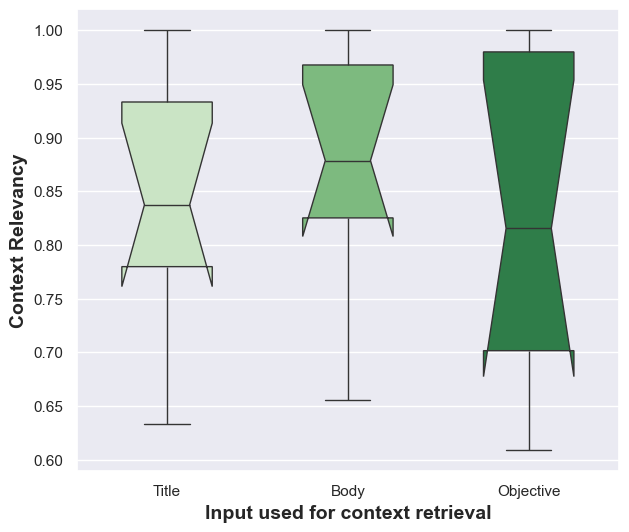

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['font.family'] = 'Times New Roman'
sns.set_theme()

df_selected = df[['title_relevance_score', 'body_relevance_score', 'objective_relevance_score']]
df_melted = df_selected.melt(var_name='Tool', value_name='Relevancy')

# Create notched box plots
plt.figure(figsize=(7, 6))
ax = sns.boxplot(x='Tool', y='Relevancy', hue='Tool',data=df_melted, notch=True, width=0.5, palette='Greens')
custom_labels = ['Title', 'Body', 'Objective']
ax.set_xticklabels(custom_labels)
# plt.xticks(rotation=15)

# Add title and labels
# plt.title('Notched Box Plots of Tool Performance')
plt.xlabel('Input used for context retrieval', fontsize=14, fontweight='bold')
plt.ylabel('Context Relevancy', fontsize=14, fontweight='bold')
plt.savefig('/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/figures/context_retreival_different_inputs.pdf')

# Show the plot
plt.show()

# Analyse Retrieved Documents

In [31]:
df = pd.read_csv(os.path.join(settings.DATA_PATH, "final_data/eval_dataset_part1.csv"))
print(df["Question"][0])

<p>When <code>src</code> has shape <code>[?]</code>, <code>tf.gather(src, tf.where(src != 0))</code> returns a tensor with shape <code>[?, 0]</code>. I'm not sure how a dimension can have size 0, and I'm especially unsure how to change the tensor back. I didn't find anything in the documentation to explain this, either.</p>

<p>I tried to <code>tf.transpose(tensor)[0]</code>, but the first dimension of the transposed tensor has size 0 and cannot be accessed! What's wrong?</p>



In [32]:
print(df["Title"][0])

Tensor has shape [?, 0] -- how to reshape to [?,]


In [17]:
df = pd.read_csv(os.path.join(settings.DATA_PATH, "final_data/eval_dataset_part1.csv"))

docs = []
for index, row in df.iterrows():
    res = {
        "QuestionID": row["QuestionId"], 
        "API Name": row["QuestionAPI"], 
        "Course_URLs":str(row["course_urls"]), 
        "YT_URLs": str(row["yt_urls"]),
        "SO_URLs": str(row["retrieve_so_urls"]),
        "Docs": f"??{row['retrieve_docs']}??"}
    docs.append(res)

new_df = pd.DataFrame(docs)
new_df.to_csv(os.path.join(settings.DATA_PATH, "final_data/retrive_docs.csv"), index=False)
new_df

QuestionID                                           API Name  \
0     51586693                                          tf.gather   
1     56286350          tf.keras.metrics.SensitivityAtSpecificity   
2     74005009                                    tf.data.Dataset   
3     51858970                                       tf.gradients   
4     60013980                      tf.nn.embedding_lookup_sparse   
5     57349824                                           tf.keras   
6     55573670     tf.nn.sparse_softmax_cross_entropy_with_logits   
7     51612489                                   tf.edit_distance   
8     54047604                                 tf.custom_gradient   
9     59555206                                           tf.keras   
10    57813806                                  tf.feature_column   
11    76324368                              tf.keras.layers.Dense   
12    68984841                              tf.keras.layers.Dense   
13    53079436                                            tf.cond   
14    61305781  tf.feature_column.categorical_column_with_voca...   
15    49987839                             tf.clip_by_global_norm   
16    55560676                                      tf.while_loop   
17    64826405                                       tf.tensordot   
18    70880589                   tf.data.experimental.cardinality   
19    59531864                                       tf.nn.conv1d   
20    58631390                                          tf.compat   
21    55422537                         tf.estimator.DNNClassifier   
22    71019644                                           tf.where   
23    62877768                                     tf.keras.Model   
24    52572275                                      tf.scatter_nd   
25    71129505                                    tf.data.Dataset   
26    56802840                                          tf.gather   

                                          Course_URLs  \
0   {'https://www.edx.org/learn/tensorflow', 'http...   
1                                               set()   
2                                               set()   
3   {'https://www.udemy.com/course/data-science-de...   
4                                               set()   
5   {'https://www.coursera.org/learn/intro-tensorf...   
6                                               set()   
7   {'https://www.edx.org/learn/tensorflow', 'http...   
8   {'https://www.coursera.org/learn/custom-distri...   
9   {'https://www.udacity.com/course/intro-to-tens...   
10                                              set()   
11  {'https://www.edx.org/learn/tensorflow', 'http...   
12  {'https://www.udacity.com/course/intro-to-tens...   
13  {'https://www.coursera.org/learn/intro-tensorf...   
14  {'https://www.udemy.com/course/tensorflow-word...   
15                                              set()   
16  {'https://www.coursera.org/learn/get-started-w...   
17  {'https://www.edx.org/learn/tensorflow', 'http...   
18  {'https://www.udemy.com/course/tensorflow-deve...   
19           {'https://www.edx.org/learn/tensorflow'}   
20  {'https://www.coursera.org/learn/intro-tensorf...   
21                                              set()   
22  {'https://www.edx.org/learn/tensorflow', 'http...   
23                                              set()   
24  {'https://www.edx.org/learn/tensorflow', 'http...   
25  {'https://www.edx.org/learn/javascript/google-...   
26  {'https://www.edx.org/learn/tensorflow', 'http...   

                                              YT_URLs  \
0     {'https://www.youtube.com/watch?v=W5TTgLqVVE8'}   
1                                               set()   
2                                               set()   
3   {'https://www.youtube.com/watch?v=us-5I52Lac8'...   
4                                               set()   
5                                               set()   
6                                               set()   
7                 

In [24]:
import ast
# new_df = new_df[new_df["Course_URLs"] != 'set()']
# new_df = new_df[new_df["YT_URLs"] != 'set()']
# new_df = new_df[new_df["SO_URLs"] != 'set()']

new_df = new_df.reset_index(drop=True)
new_df

QuestionID               API Name  \
0     51586693              tf.gather   
1     51858970           tf.gradients   
2     54047604     tf.custom_gradient   
3     59555206               tf.keras   
4     76324368  tf.keras.layers.Dense   
5     68984841  tf.keras.layers.Dense   
6     53079436                tf.cond   
7     55560676          tf.while_loop   
8     64826405           tf.tensordot   
9     71019644               tf.where   
10    52572275          tf.scatter_nd   
11    71129505        tf.data.Dataset   

                                          Course_URLs  \
0   {'https://www.edx.org/learn/tensorflow', 'http...   
1   {'https://www.udemy.com/course/data-science-de...   
2   {'https://www.coursera.org/learn/custom-distri...   
3   {'https://www.udacity.com/course/intro-to-tens...   
4   {'https://www.edx.org/learn/tensorflow', 'http...   
5   {'https://www.udacity.com/course/intro-to-tens...   
6   {'https://www.coursera.org/learn/intro-tensorf...   
7   {'https://www.coursera.org/learn/get-started-w...   
8   {'https://www.edx.org/learn/tensorflow', 'http...   
9   {'https://www.edx.org/learn/tensorflow', 'http...   
10  {'https://www.edx.org/learn/tensorflow', 'http...   
11  {'https://www.edx.org/learn/javascript/google-...   

                                              YT_URLs  \
0     {'https://www.youtube.com/watch?v=W5TTgLqVVE8'}   
1   {'https://www.youtube.com/watch?v=us-5I52Lac8'...   
2   {'https://www.youtube.com/watch?v=kq6mpyjSQ3w'...   
3     {'https://www.youtube.com/watch?v=oJ1i2c1KxKk'}   
4   {'https://www.youtube.com/watch?v=lor2LnEVn8M'...   
5   {'https://www.youtube.com/watch?v=oJ1i2c1KxKk'...   
6   {'https://www.youtube.com/watch?v=YAJIIfW_OtA'...   
7   {'https://www.youtube.com/watch?v=GSZhXVjuLgA'...   
8   {'https://www.youtube.com/watch?v=0PGnW7ZN3sg'...   
9   {'https://www.youtube.com/watch?v=0qu976IG0hQ'...   
10    {'https://www.youtube.com/watch?v=9buk4Z_JlXk'}   
11    {'https://www.youtube.com/watch?v=k9cuKNnLF9w'}   

                                              SO_URLs  \
0   {'https://stackoverflow.com/questions/55375665...   
1   {'https://stackoverflow.com/questions/51858970...   
2   {'https://stackoverflow.com/questions/54047604...   
3   {'https://stackoverflow.com/questions/56918388...   
4   {'https://stackoverflow.com/questions/43755293...   
5   {'https://stackoverflow.com/questions/60783216...   
6   {'https://stackoverflow.com/questions/53079436...   
7   {'https://stackoverflow.com/questions/64298298...   
8   {'https://stackoverflow.com/questions/51266507...   
9   {'https://stackoverflow.com/questions/38193958...   
10  {'https://stackoverflow.com/questions/37670886...   
11  {'https://stackoverflow.com/questions/51125266...   

                                                 Docs  
0   ??[[Document(page_content='Stack Overflow Publ...  
1   ??[[Document(page_content='Skip to main conten...  
2   ??[[Document(page_content='Stack Overflow Publ...  
3   ??[[Document(page_content='Skip to main conten...  
4   ??[[Document(page_content='Skip to main conten...  
5   ??[[Document(page_content='Stack Overflow Publ...  
6   ??[[Document(page_content='Stack Overflow Publ...  
7   ??[[Document(page_content='Skip to main conten...  
8   ??[[Document(page_content='Skip to main conten...  
9   ??[[Document(page_content='Skip to main conten...  
10  ??[[Document(page_content='Stack Overflow Publ...  
11  ??[[Document(page_content='Skip to main conten...

In [29]:
new_df.to_csv(os.path.join(settings.DATA_PATH, "final_data/retrive_docs.csv"), index=False)

In [28]:
for index, row in new_df.iterrows():
    print(f"==================== {row['API Name']} ====================\n")
    print(row["Docs"])
    print("\n\n")

==================== tf.gather ====================

??[[Document(page_content='Stack Overflow Public questions & answers\n\nStack Overflow for Teams Where developers & technologists share private knowledge with coworkers\n\nTalent Build your employer brand\n\nAdvertising Reach developers & technologists worldwide\n\nLabs The future of collective knowledge sharing\n\nCollectives™ on Stack Overflow\n\nFind centralized, trusted content and collaborate around the technologies you use most. Learn more about Collectives\n\nConnect and share knowledge within a single location that is structured and easy to search. Learn more about Teams\n\nGet early access and see previews of new features. Learn more about Labs\n\nIs there a way to apply a function to dimension 0 of a tensorflow array having the shape (None, 2)\n\nAsked 4 years, 3 months ago\n\nModified 4 years, 3 months ago\n\nI have a very technical question related to TensorFlow.\n\nI have a TensorFlow matrix having a dimension of (None, 

In [30]:
# SO Commmon Term during retrieval:
# Stack Overflow Public questions & answers\n\nStack Overflow for Teams Where developers & technologists share private knowledge with coworkers\n\nTalent Build your employer brand\n\nAdvertising Reach developers & technologists worldwide\n\nLabs The future of collective knowledge sharing\n\nCollectives™ on Stack Overflow\n\nFind centralized, trusted content and collaborate around the technologies you use most. Learn more about Collectives\n\n
# \n\nTo subscribe to this RSS feed, copy and paste this URL into your RSS reader.